In [74]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.dirname(os.getcwd()))
#from src import cleaning
#from src import outliers_detection

### Data load

In [75]:
df1 = pd.read_parquet("/home/asado/Descargas/Anyone AI/final_sprint/FinalProject/yellow_tripdata_2022-05.parquet") ##change the path for your own local
df1.sample(10, random_state=42) #seed of randomness for reproducibility

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
3043622,2,2022-05-27 16:45:16,2022-05-27 16:52:08,1.0,0.90,1.0,N,249,114,1,6.0,1.0,0.5,2.06,0.0,0.3,12.36,2.5,0.0
208456,1,2022-05-03 10:01:56,2022-05-03 10:19:06,1.0,0.80,1.0,N,141,141,2,6.5,2.5,0.5,0.00,0.0,0.3,9.80,2.5,0.0
942942,1,2022-05-09 16:59:46,2022-05-09 17:03:47,1.0,0.70,1.0,N,151,238,1,5.0,3.5,0.5,1.85,0.0,0.3,11.15,2.5,0.0
247636,2,2022-05-03 16:30:52,2022-05-03 16:41:19,1.0,1.72,1.0,N,87,148,1,8.5,1.0,0.5,2.56,0.0,0.3,15.36,2.5,0.0
3052006,2,2022-05-27 18:45:16,2022-05-27 18:53:46,1.0,1.54,1.0,N,42,24,1,8.0,1.0,0.5,1.96,0.0,0.3,11.76,0.0,0.0
1291561,2,2022-05-12 15:22:00,2022-05-12 15:29:22,5.0,1.03,1.0,N,107,234,1,6.5,0.0,0.5,1.00,0.0,0.3,10.80,2.5,0.0
3073378,2,2022-05-27 21:24:03,2022-05-27 21:32:10,4.0,1.19,1.0,N,161,48,1,7.0,0.5,0.5,2.16,0.0,0.3,12.96,2.5,0.0
3423926,2,2022-05-31 18:53:00,2022-05-31 19:03:35,1.0,1.78,1.0,N,163,234,1,9.0,1.0,0.5,2.66,0.0,0.3,15.96,2.5,0.0
3486168,2,2022-05-06 18:40:00,2022-05-06 18:44:00,NaN,0.83,NaN,None,87,45,0,10.0,0.0,0.5,2.00,0.0,0.3,15.30,NaN,NaN
778070,2,2022-05-07 22:12:17,2022-05-07 22:24:17,2.0,1.68,1.0,N,161,107,2,9.5,0.5,0.5,0.00,0.0,0.3,13.30,2.5,0.0


In [76]:
df2 = pd.read_csv("/home/asado/Descargas/taxi+_zone_lookup.csv")

In [77]:
df = pd.merge(df1, df2, left_on= "RatecodeID", right_on= "LocationID")
df.sample(10, random_state=42)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,LocationID,Borough,Zone,service_zone
1669801,1,2022-05-16 16:30:07,2022-05-16 16:37:42,2.0,0.80,1.0,N,163,237,1,...,2.70,0.00,0.3,13.50,2.5,0.00,1,EWR,Newark Airport,EWR
80252,1,2022-05-01 21:46:25,2022-05-01 21:52:23,1.0,1.10,1.0,N,236,238,1,...,1.03,0.00,0.3,11.33,2.5,0.00,1,EWR,Newark Airport,EWR
2363974,2,2022-05-22 21:38:03,2022-05-22 21:49:17,1.0,1.31,1.0,N,100,50,2,...,0.00,0.00,0.3,12.80,2.5,0.00,1,EWR,Newark Airport,EWR
1654788,1,2022-05-16 14:04:22,2022-05-16 14:07:13,1.0,0.30,1.0,N,237,162,1,...,1.45,0.00,0.3,8.75,2.5,0.00,1,EWR,Newark Airport,EWR
3401622,1,2022-05-31 14:08:10,2022-05-31 15:02:36,1.0,16.70,2.0,N,161,132,1,...,10.00,6.55,0.3,71.85,2.5,0.00,2,Queens,Jamaica Bay,Boro Zone
299171,2,2022-05-04 08:15:50,2022-05-04 08:27:33,1.0,1.87,1.0,N,50,237,1,...,3.20,0.00,0.3,16.00,2.5,0.00,1,EWR,Newark Airport,EWR
1234367,2,2022-05-12 17:58:25,2022-05-12 18:08:19,1.0,1.01,1.0,N,234,68,1,...,2.36,0.00,0.3,14.16,2.5,0.00,1,EWR,Newark Airport,EWR
2649548,2,2022-05-25 17:06:05,2022-05-25 17:27:37,1.0,3.60,1.0,N,233,114,2,...,0.00,0.00,0.3,19.80,2.5,0.00,1,EWR,Newark Airport,EWR
134799,1,2022-05-02 15:23:31,2022-05-02 15:29:44,1.0,1.20,1.0,N,229,137,1,...,1.00,0.00,0.3,10.80,2.5,0.00,1,EWR,Newark Airport,EWR
1078504,2,2022-05-11 12:43:58,2022-05-11 12:54:35,1.0,6.07,1.0,N,132,139,2,...,0.00,0.00,0.3,20.05,0.0,1.25,1,EWR,Newark Airport,EWR


### Data descriptive analysis

In [78]:
print(f"This dataset is composed of {df.shape[0]} rows and {df.shape[1]} columns")

This dataset is composed of 3458771 rows and 23 columns


Since the dataset is very big and it's gonne consume a lot of hardware, we will work with a subsample.

In [92]:
df_subset = df.sample(10000, random_state=42) #seed of randomness for reproducibility

In [93]:
df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1669801 to 1752054
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   VendorID               10000 non-null  int64         
 1   tpep_pickup_datetime   10000 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  10000 non-null  datetime64[ns]
 3   passenger_count        10000 non-null  float64       
 4   trip_distance          10000 non-null  float64       
 5   RatecodeID             10000 non-null  float64       
 6   store_and_fwd_flag     10000 non-null  object        
 7   PULocationID           10000 non-null  int64         
 8   DOLocationID           10000 non-null  int64         
 9   payment_type           10000 non-null  int64         
 10  fare_amount            10000 non-null  float64       
 11  extra                  10000 non-null  float64       
 12  mta_tax                10000 non-null  float64       
 13

### Check for unique values and na's

In [81]:
df_subset.isna().sum()/df_subset.shape[0]*100

VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
store_and_fwd_flag       0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
airport_fee              0.0
LocationID               0.0
Borough                  0.0
Zone                     0.0
service_zone             0.0
dtype: float64

Very few null values, so they can be taken out of the dataset withoput losing much information.

In [82]:
df.nunique()/df.shape[0]*100

VendorID                  0.000058
tpep_pickup_datetime     49.916950
tpep_dropoff_datetime    49.859705
passenger_count           0.000289
trip_distance             0.134412
RatecodeID                0.000202
store_and_fwd_flag        0.000058
PULocationID              0.007459
DOLocationID              0.007546
payment_type              0.000116
fare_amount               0.065312
extra                     0.001590
mta_tax                   0.000376
tip_amount                0.107119
tolls_amount              0.021626
improvement_surcharge     0.000087
total_amount              0.358538
congestion_surcharge      0.000202
airport_fee               0.000087
LocationID                0.000202
Borough                   0.000145
Zone                      0.000202
service_zone              0.000087
dtype: float64

We can say that we dont have a lot of variability in the dataset, except for two variables that will be transformed in the next step.

### Creation of a "duration" variable

One of the aims of the projects it's to predict duration of the trips baes in all other variables, so we will form the duration variable calculating a diference between trip drop-off and pick up, as it follows:

In [83]:
df_subset["duration"] = df_subset["tpep_dropoff_datetime"] - df_subset["tpep_pickup_datetime"]
df_subset["duration"] = df_subset["duration"].dt.total_seconds() / 60
df_subset = df_subset.drop(["tpep_pickup_datetime", "tpep_dropoff_datetime"], axis=1)

In [84]:
round(df_subset.describe(),2)

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,LocationID,duration
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,1.69,1.40,3.60,1.37,164.88,163.77,1.23,14.87,1.07,0.49,2.76,0.58,0.30,21.74,2.28,0.10,1.37,17.40
std,0.46,0.98,4.60,5.28,65.72,70.34,0.47,14.72,1.27,0.09,3.24,2.15,0.04,18.33,0.75,0.35,5.28,42.11
min,1.00,0.00,0.00,1.00,1.00,1.00,1.00,-120.00,-4.50,-0.50,0.00,-33.75,-0.30,-156.55,-2.50,-1.25,1.00,0.00
25%,1.00,1.00,1.13,1.00,132.00,114.00,1.00,7.00,0.00,0.50,0.83,0.00,0.30,12.30,2.50,0.00,1.00,7.48
50%,2.00,1.00,1.90,1.00,162.00,162.00,1.00,10.50,0.50,0.50,2.16,0.00,0.30,15.96,2.50,0.00,1.00,12.45
75%,2.00,1.00,3.67,1.00,234.00,234.00,1.00,16.50,2.50,0.50,3.36,0.00,0.30,23.15,2.50,0.00,1.00,20.05
max,2.00,6.00,59.52,99.00,265.00,265.00,4.00,500.00,8.25,0.50,55.00,31.85,0.30,500.30,2.50,1.25,99.00,1433.17


### EDA graphical phase

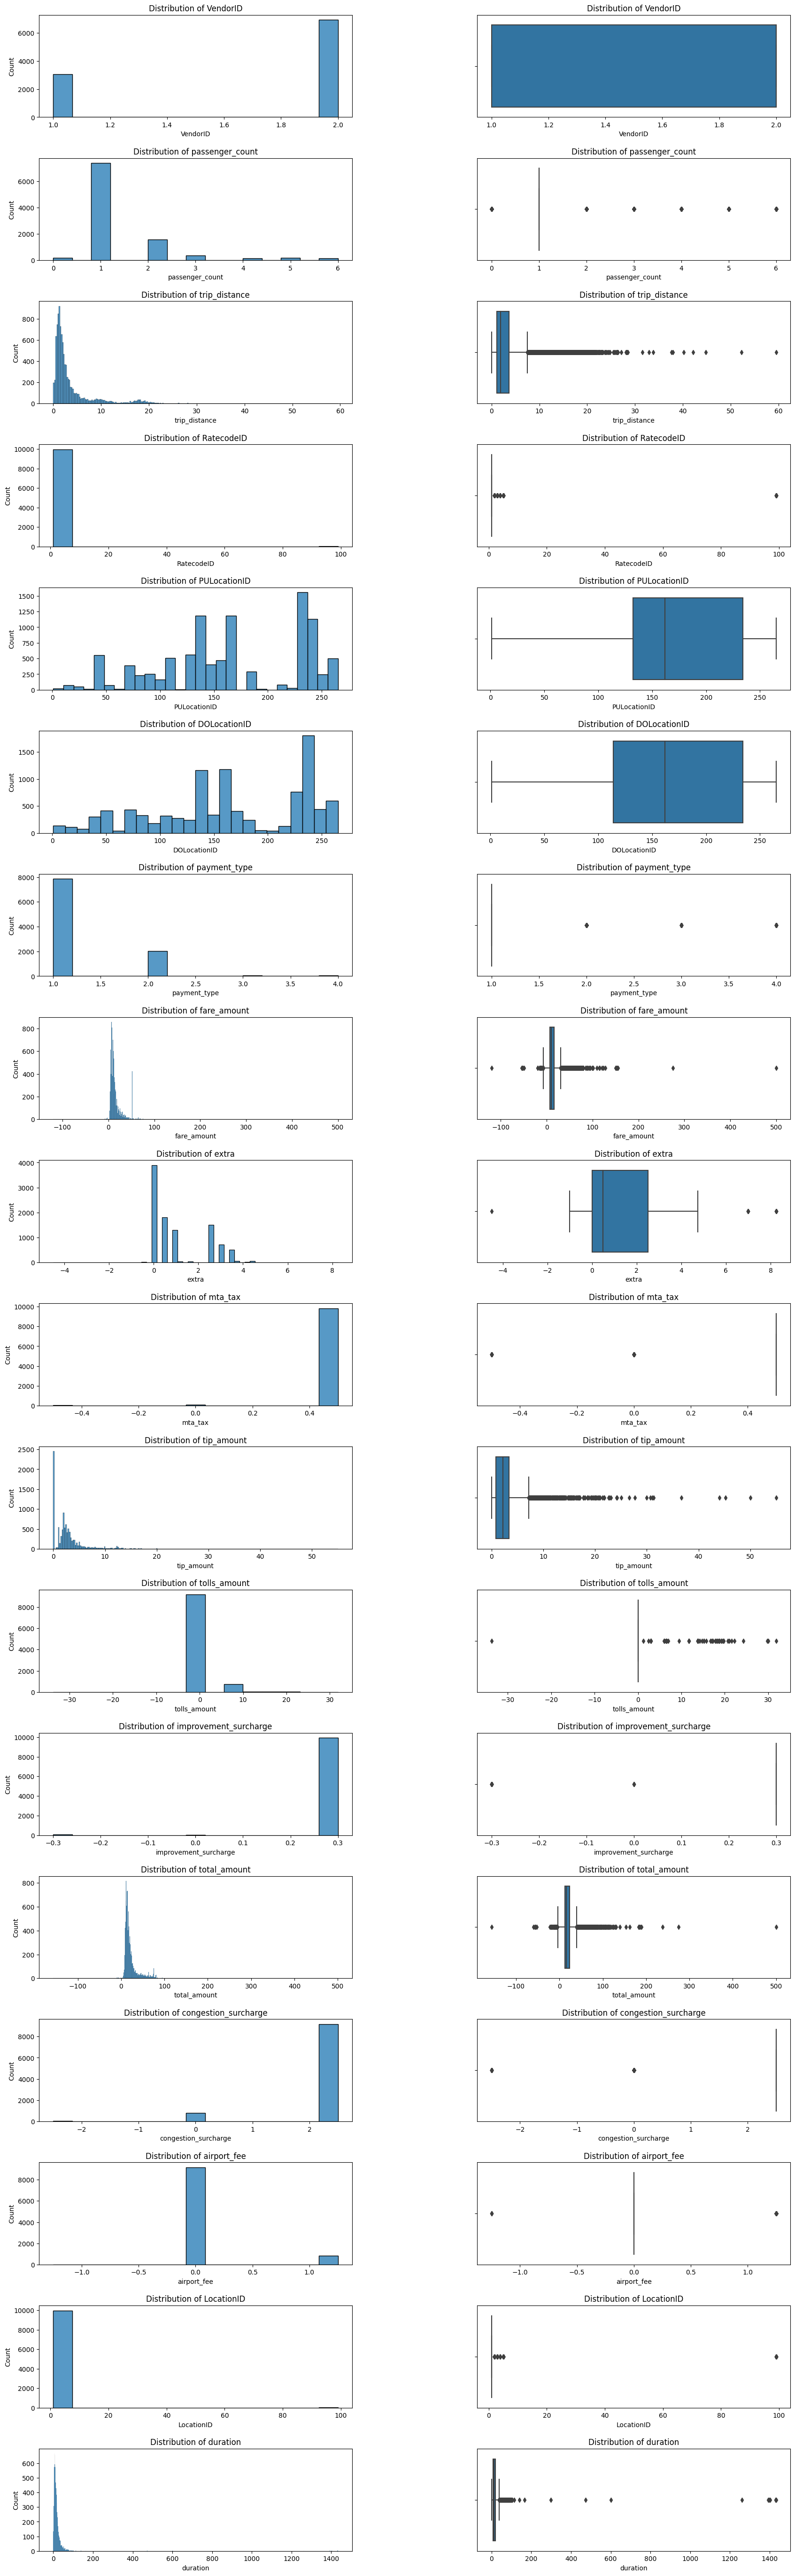

In [85]:
string_columns = df_subset.select_dtypes(include='object')
columns = df_subset.drop(string_columns, axis=1).columns
fig, axes = plt.subplots(nrows=len(columns), ncols=2, figsize=(20,60))

for index, col in enumerate(columns):
  axes[index][0].set_title(f"Distribution of {col}")
  sns.histplot(x=df_subset[col], ax=axes[index][0])
  axes[index][1].set_title(f"Distribution of {col}")
  sns.boxplot(x=df_subset[col], ax=axes[index][1])

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

Knowing that the dataset contains variables that are not informative, we will drop the variables "Vendor ID" (just codifies the company on wich the cellphone works), "store_and_fwd_flag" (not relevant information) and "payment_type" (just code the customers prefered payment type and there is an overrepresentaion of cash).

In [109]:
df_subset = df_subset.drop(["VendorID", "payment_type"], axis=1)

In [ ]:
columns = string_columns.columns
fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(20,60))

for index, col in enumerate(columns):
  axes[index][0].set_title(f"Distribution of {col}")
  sns.countplot(x=df_subset[col], ax=axes[index][0])

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

Distribution of store_and_fwd_flag


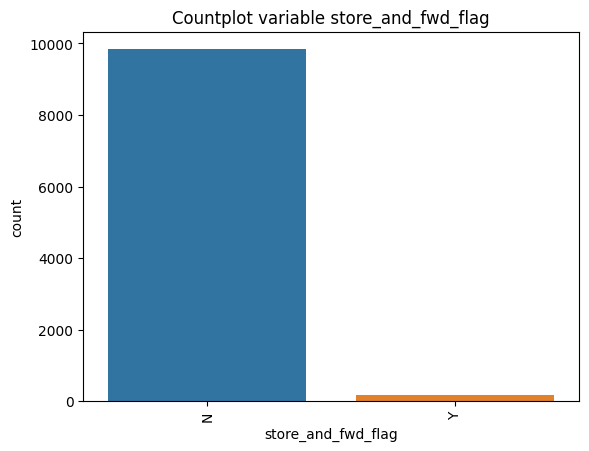

In the variable store_and_fwd_flag there is 2 unique values
THe most frequent value is N (98.4 %), followed by Y (1.6%)
--------------------------------------------------------------

Distribution of Borough


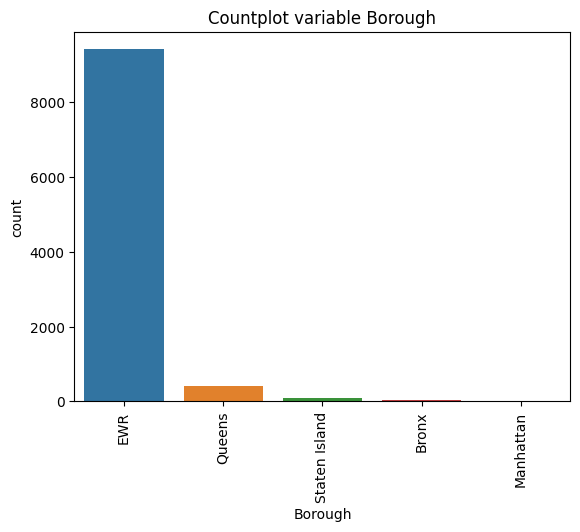

In the variable Borough there is 5 unique values
THe most frequent value is EWR (94.17 %), followed by Queens (4.2%)
--------------------------------------------------------------

Distribution of Zone


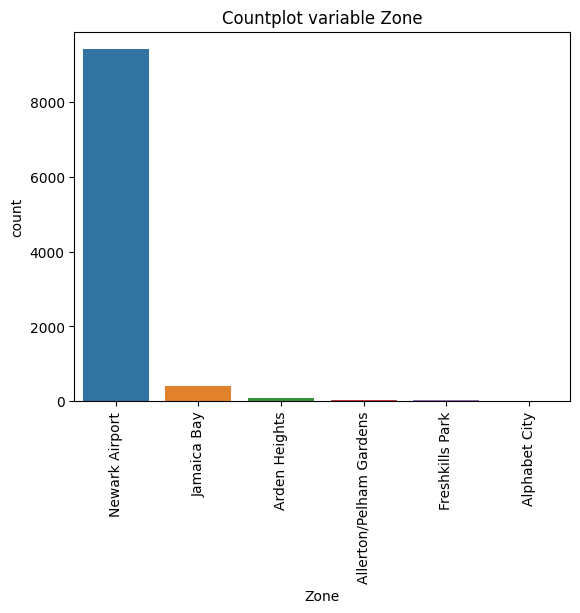

In the variable Zone there is 6 unique values
THe most frequent value is Newark Airport (94.17 %), followed by Jamaica Bay (4.2%)
--------------------------------------------------------------

Distribution of service_zone


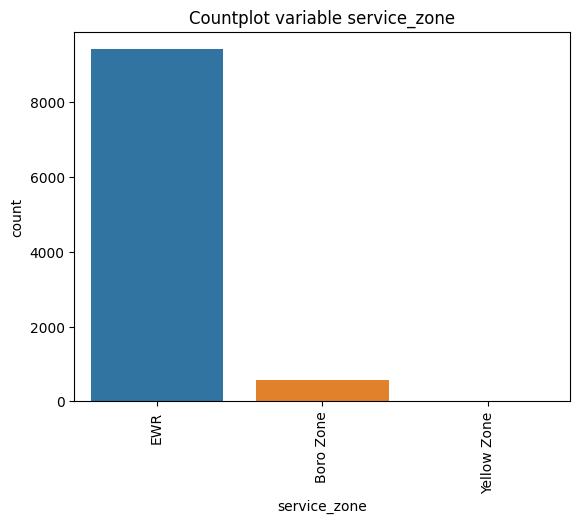

In the variable service_zone there is 3 unique values
THe most frequent value is EWR (94.17 %), followed by Boro Zone (5.69%)
--------------------------------------------------------------



In [100]:
for elem in string_columns.columns:

  print(f"Distribution of {elem}", end = "\n")

  #Plot
  fig = plt.figure()
  ax = plt.axes()
  ax = sns.countplot(x=elem, data=df_subset, order=df_subset[elem].value_counts().index)
  plt.xticks(rotation=90)
  plt.title("Countplot variable " + elem)
  plt.show()

  # Number of unique values
  print(f"In the variable {elem} there is {df_subset[elem].nunique()} unique values")

  # Most frequent values
  df_aux = pd.DataFrame(df_subset.groupby(elem).count()["RatecodeID"].sort_values(ascending=False).head(2)) / df_subset.shape[0] *100
  df_aux.reset_index(drop=False, inplace=True)
  print(f"The most frequent value is {df_aux.iloc[0,0]} ({round(df_aux.iloc[0,1],2)} %), followed by {df_aux.iloc[1,0]} ({round(df_aux.iloc[1,1],2)}%)")

  print("--------------------------------------------------------------", end = "\n\n")


In [101]:
df_subset = df_subset.drop(["store_and_fwd_flag","Borough", "service_zone"], axis=1)

### Outliers detection

In [102]:
def outliers_detection (variable):
  fig, axes = plt.subplots(nrows=1, ncols=2)
  fig.suptitle(variable)
  axes[0].hist(df_subset[variable])
  axes[1].boxplot(x=variable, data=df)
  plt.show()
  percentile_25 = np.percentile(df_subset[variable], 25)
  percentile_50 = np.percentile(df_subset[variable], 50)
  percentile_75 = np.percentile(df_subset[variable], 75)
  print(f"mín = {df_subset[variable].min()}")
  print(f"Percentile 0.25 = {percentile_25}")
  print(f"Percentile 0.50 = {percentile_25}")
  print(f"Percentile 0.75 = {percentile_75}")
  print(f"max = {df_subset[variable].max()}")

In [103]:
def clean_outliers (variable):
  iqr = np.percentile(df_subset[variable], 75)- np.percentile(df_subset[variable], 25)
  max = np.percentile(df_subset[variable], 75) + 1.5 *iqr
  min = np.percentile(df_subset[variable], 25)- 1.5*iqr
  filtered = df_subset[(df_subset[variable] <= max) & (df_subset[variable] >= min)]
  return filtered

## Chequear si hay mas de un dropout zone por viaje (viajes compartidos). Googlear 

In [110]:
df_subset.columns

Index(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count',
       'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'congestion_surcharge',
       'airport_fee', 'LocationID', 'Zone'],
      dtype='object')

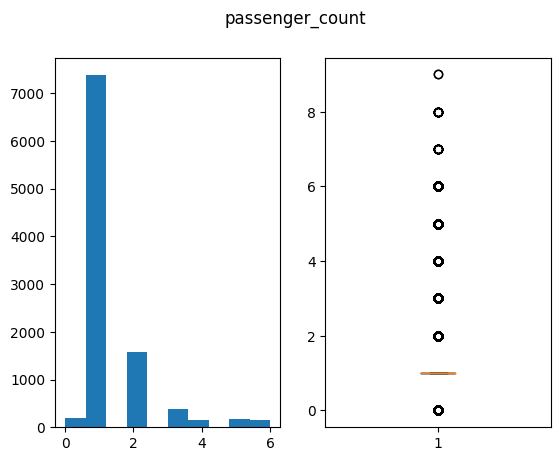

mín = 0.0
Percentile 0.25 = 1.0
Percentile 0.50 = 1.0
Percentile 0.75 = 1.0
max = 6.0


In [104]:
outliers_detection('passenger_count')

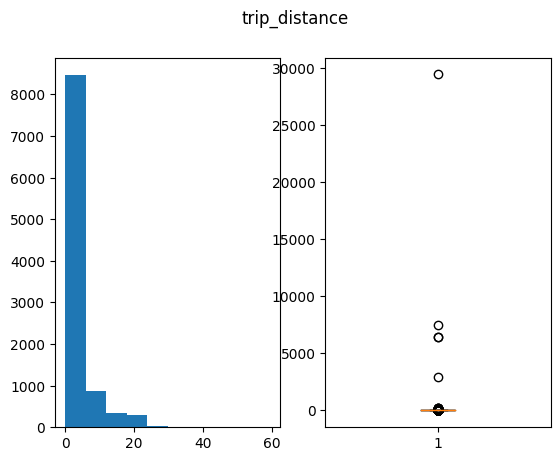

mín = 0.0
Percentile 0.25 = 1.13
Percentile 0.50 = 1.13
Percentile 0.75 = 3.67
max = 59.52


In [106]:
outliers_detection('trip_distance')

In [107]:
filtered_df = clean_outliers('trip_distance')

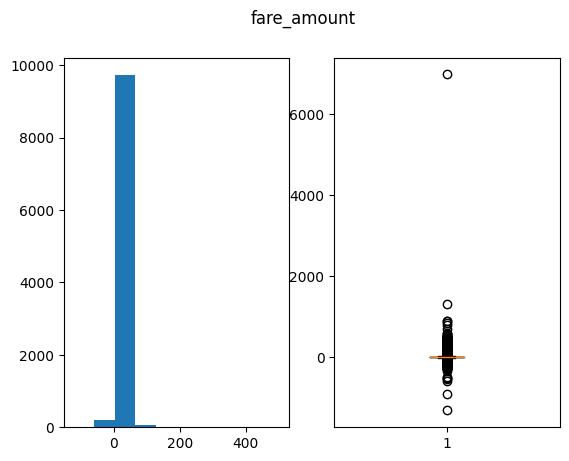

mín = -120.0
Percentile 0.25 = 7.0
Percentile 0.50 = 7.0
Percentile 0.75 = 16.5
max = 500.0


In [111]:
outliers_detection('fare_amount')

In [113]:
filtered_df = clean_outliers('fare_amount')

In [118]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8944 entries, 1669801 to 1752054
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tpep_pickup_datetime   8944 non-null   datetime64[ns]
 1   tpep_dropoff_datetime  8944 non-null   datetime64[ns]
 2   passenger_count        8944 non-null   float64       
 3   trip_distance          8944 non-null   float64       
 4   RatecodeID             8944 non-null   float64       
 5   PULocationID           8944 non-null   int64         
 6   DOLocationID           8944 non-null   int64         
 7   fare_amount            8944 non-null   float64       
 8   extra                  8944 non-null   float64       
 9   mta_tax                8944 non-null   float64       
 10  tip_amount             8944 non-null   float64       
 11  tolls_amount           8944 non-null   float64       
 12  improvement_surcharge  8944 non-null   float64       
 13 

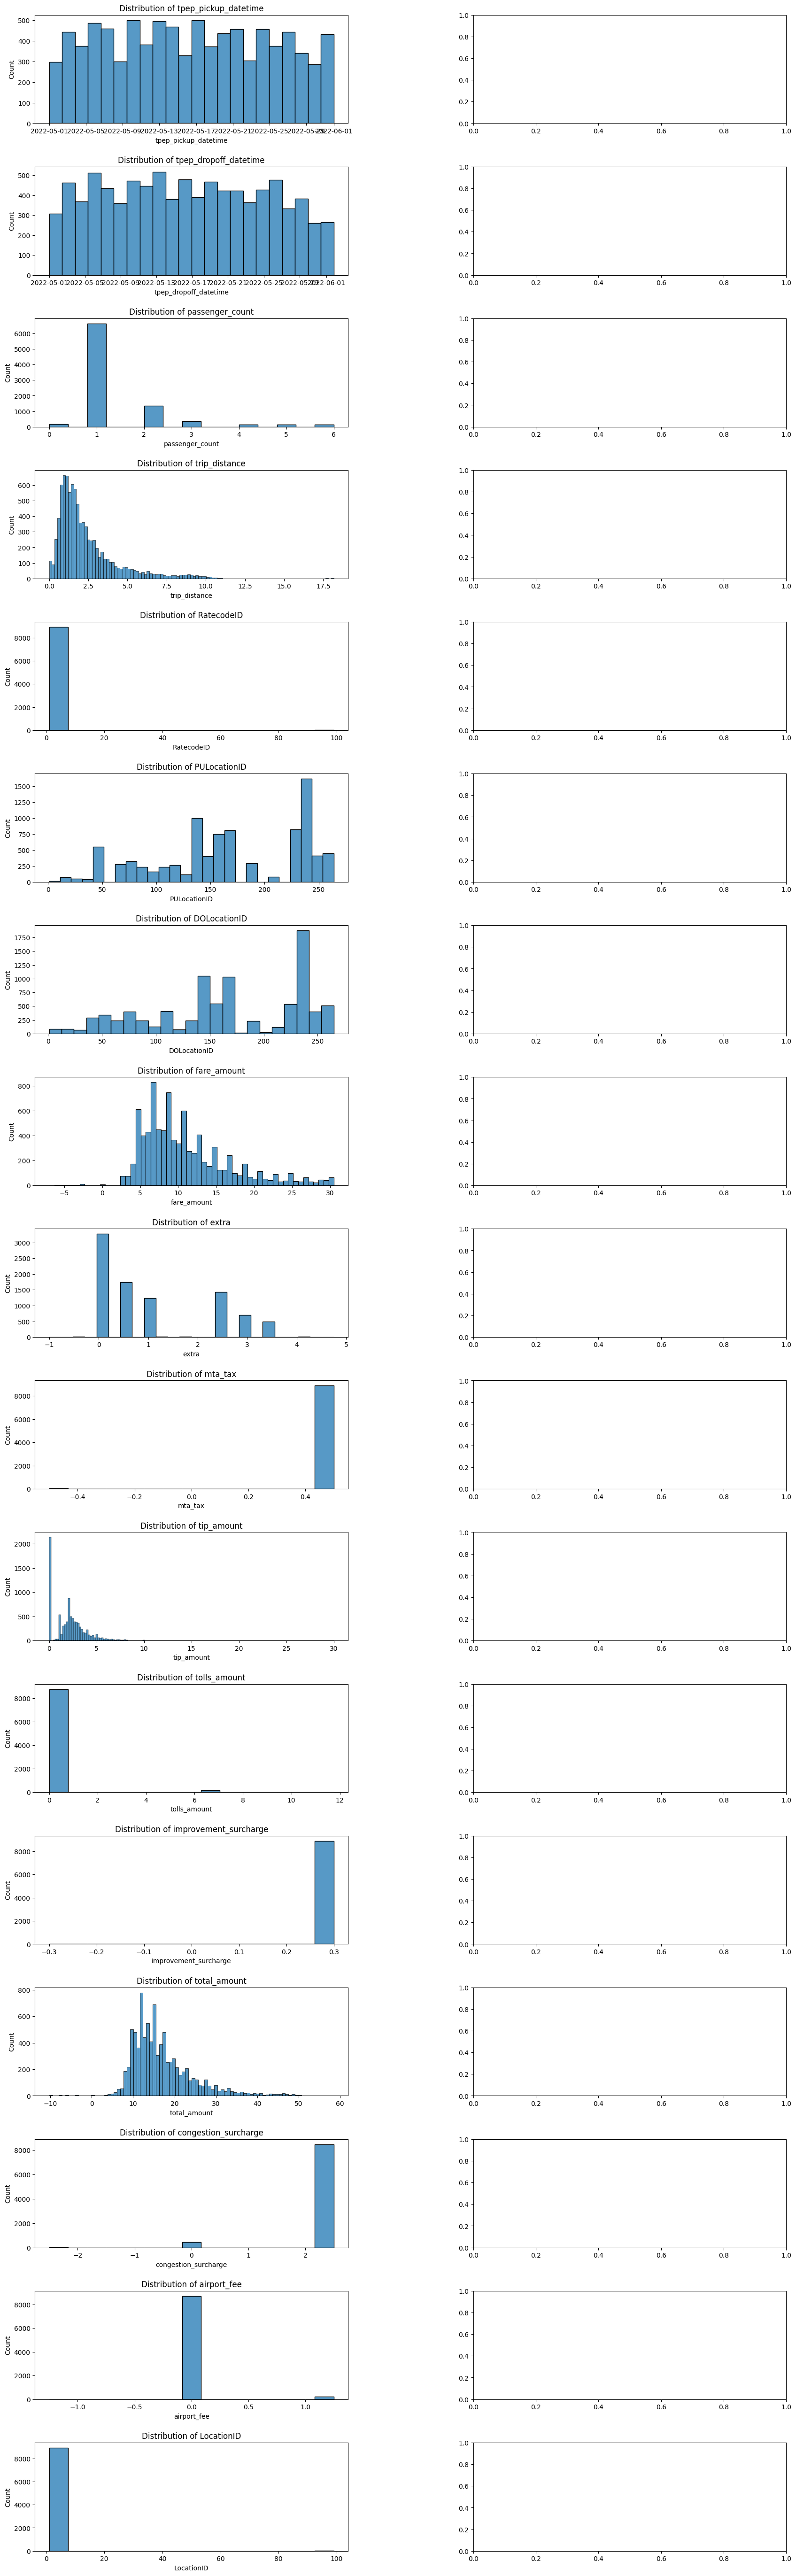

In [120]:

columns = filtered_df.drop("Zone", axis=1).columns
fig, axes = plt.subplots(nrows=len(columns), ncols=2, figsize=(20,60))

for index, col in enumerate(columns):
  axes[index][0].set_title(f"Distribution of {col}")
  sns.histplot(x=filtered_df[col], ax=axes[index][0])
  #axes[index][1].set_title(f"Distribution of {col}")
  #sns.boxplot(x=filtered_df[col], ax=axes[index][1])

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=1, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

### Correlation map

In [ ]:
df_numerics = filtered_df[['passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'duration']] 

<Axes: >

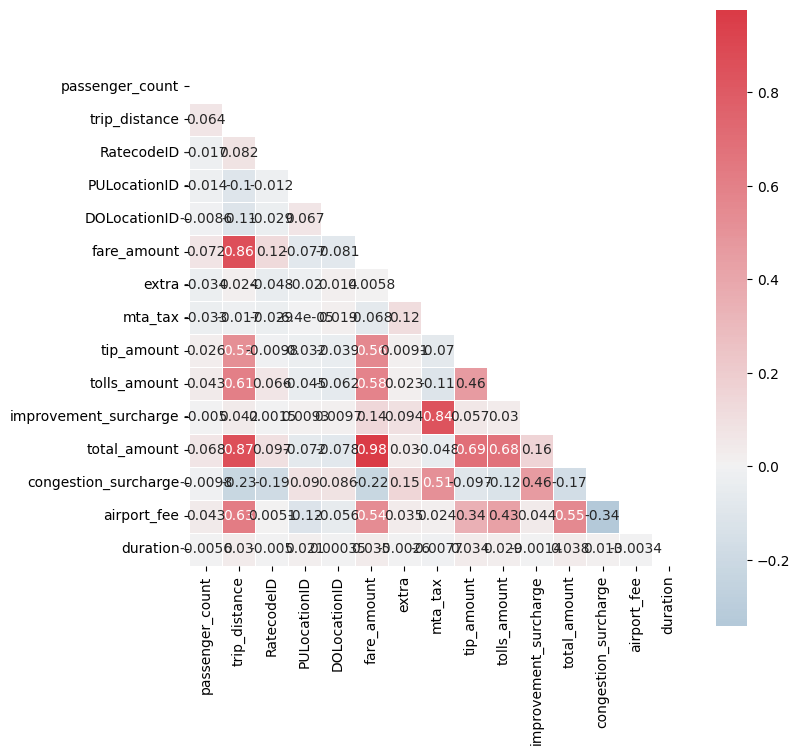

In [20]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_numerics.corr(), dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(240, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_numerics.corr(), mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, annot=True)

In [ ]:
#sns.pairplot(df_numerics, hue='RatecodeID', corner=True)

### Train/test split

In [25]:
X = df_numerics.drop("duration", axis=1)
y = df_numerics["duration"]

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### First model: linear regression

In [28]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

R square for linear explicability

In [30]:
reg.score(X_train, y_train), reg.score(X_test, y_test)

(0.003781845318713728, 0.0018590796362579765)

In [31]:
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

ValueError: x and y must be the same size

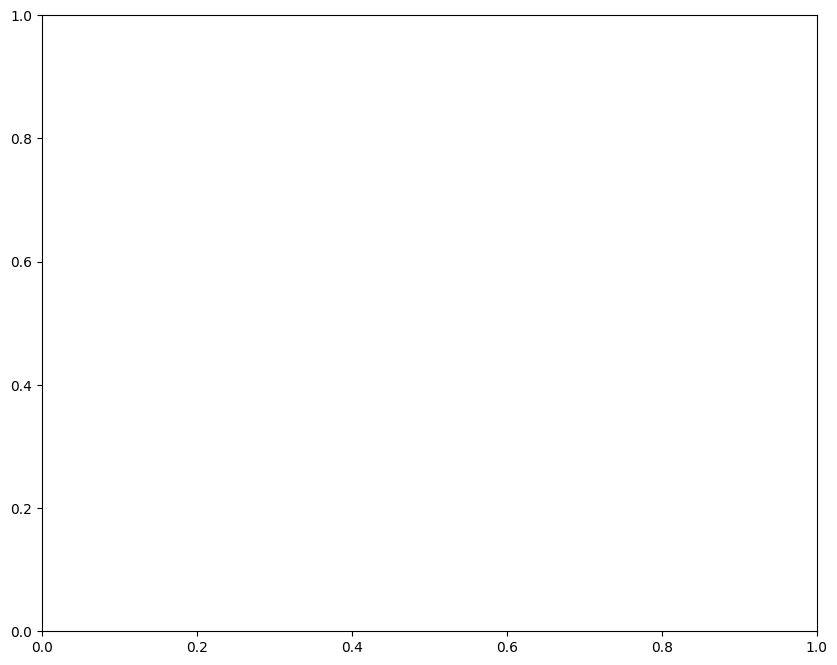

In [33]:
plt.figure(figsize = (10,8))

plt.scatter(X_test, y_test,  color='red', label = 'Test')
plt.plot(X_test, y_test_pred, color='blue', linewidth=5.0, label = 'Prediction Test')

plt.scatter(X_train, y_train,  color='green', label = 'Train')
plt.plot(X_train, y_train_pred, color='k', linestyle = '--', label = 'Prediction Train')

plt.legend()
plt.show()

MSE for measuring performance

In [36]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_train, reg.predict(X_train)), mean_squared_error(y_test, reg.predict(X_test))

(4.672779355910921, 4.280680802186461)